In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time


In [27]:
from orbithunter.convolutional_neural_networks import orbit_cnn
from orbithunter.gluing import tile_dictionary_ks

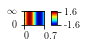

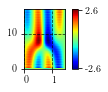

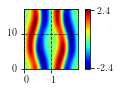

In [3]:
td = tile_dictionary_ks(padded=False)

td[0].plot()

td[1].plot()

td[2].plot()

tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

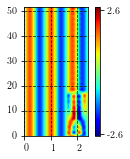

In [4]:
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)

tiling_example = tile(symbol_arrays[0], tile_dictionary, OrbitKS)

tiling_example.plot()

In [25]:
symbol_arrays[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [5]:
from collections import Counter
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)
X = []
symbol_y = []
converge_y = []

for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])
y = symbol_y

In [6]:
np.array(y).shape, np.array(X).shape

((2176, 3), (2176, 32, 32))

In [7]:
cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 2s 869us/sample - loss: 3.8919 - val_loss: 1.5446
Epoch 2/100
1740/1740 [==============================] - 1s 640us/sample - loss: 0.9371 - val_loss: 0.2869
Epoch 3/100
1740/1740 [==============================] - 1s 654us/sample - loss: 0.1395 - val_loss: 0.0510
Epoch 4/100
1740/1740 [==============================] - 1s 653us/sample - loss: 0.0269 - val_loss: 0.0130
Epoch 5/100
1740/1740 [==============================] - 1s 753us/sample - loss: 0.0090 - val_loss: 0.0060
Epoch 6/100
1740/1740 [==============================] - 1s 754us/sample - loss: 0.0049 - val_loss: 0.0065
Epoch 7/100
1740/1740 [==============================] - 1s 763us/sample - loss: 0.0038 - val_loss: 0.0060
Epoch 8/100
1740/1740 [==============================] - 1s 726us/sample - loss: 0.002

1740/1740 [==============================] - 1s 736us/sample - loss: 0.0091 - val_loss: 0.0011
Epoch 73/100
1740/1740 [==============================] - 1s 636us/sample - loss: 7.0808e-04 - val_loss: 5.7056e-04
Epoch 74/100
1740/1740 [==============================] - 1s 634us/sample - loss: 5.6306e-04 - val_loss: 4.3537e-04
Epoch 75/100
1740/1740 [==============================] - 1s 640us/sample - loss: 4.0814e-04 - val_loss: 7.0632e-04
Epoch 76/100
1740/1740 [==============================] - 1s 683us/sample - loss: 5.1113e-04 - val_loss: 2.1922e-04
Epoch 77/100
1740/1740 [==============================] - 1s 678us/sample - loss: 3.3622e-04 - val_loss: 5.4586e-04
Epoch 78/100
1740/1740 [==============================] - 1s 633us/sample - loss: 2.2793e-04 - val_loss: 2.7611e-04
Epoch 79/100
1740/1740 [==============================] - 1s 626us/sample - loss: 5.4139e-04 - val_loss: 6.4303e-04
Epoch 80/100
1740/1740 [==============================] - 1s 649us/sample - loss: 4.5069e-04 

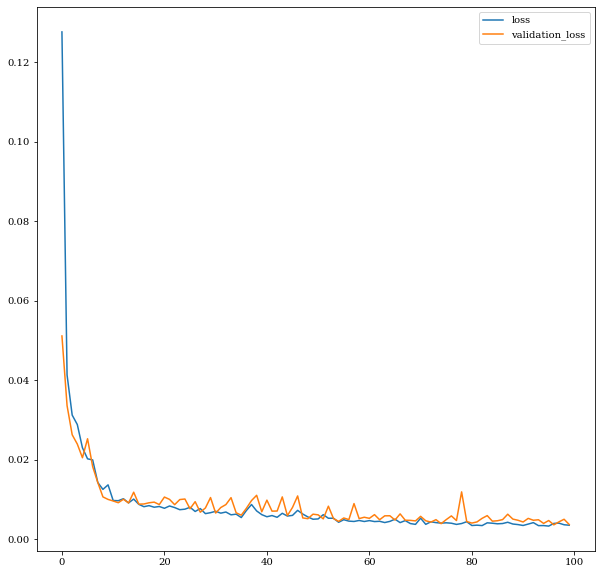

In [21]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(10,10))
_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

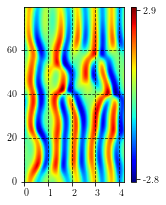

In [9]:
example_orbit_ = read_h5('OrbitKS_L37p297_T79p783.h5', directory='../data/test_data/', data_format='orbithunter_old')
example_orbit_.plot()
example_orbit_ = rediscretize(example_orbit_, new_shape=(32,32))

Example L: 37.2975727936789 Sum_L for Tiles 37.000844133611395


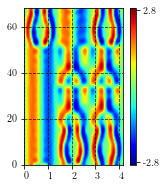

In [10]:
print('Example L:', example_orbit_.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)
guess_symbol_array = np.array([[2,0,2],[0,1,1],[0,1,1],[0,2,2]])
approximate_tiling = rediscretize(tile(guess_symbol_array, td, OrbitKS), new_shape=(32, 32))
approximate_tiling.plot()

In [23]:
print(np.matrix(guess_symbol_array))

test_converge_result = converge(approximate_tiling, method='hybrid')
test_tiling = test_converge_result.orbit

[[2 0 2]
 [0 1 1]
 [0 1 1]
 [0 2 2]]


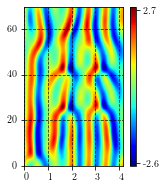

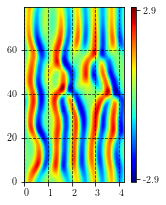

In [26]:
test_tiling.rotate(-0.25, axis=1).plot()
example_orbit_.plot()

In [12]:
cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

array([[2.0345564, 4.231833 , 4.475503 ]], dtype=float32)

In [13]:
from sklearn.metrics import mean_squared_error

y_predict = cnn.predict(X_test)
mse_array = mean_squared_error(y_test, y_predict)

In [14]:
y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = y_bottleneck

In [15]:
bottleneck_cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2) 

Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 2s 890us/sample - loss: 0.1276 - val_loss: 0.0511
Epoch 2/100
1740/1740 [==============================] - 1s 646us/sample - loss: 0.0413 - val_loss: 0.0336
Epoch 3/100
1740/1740 [==============================] - 1s 630us/sample - loss: 0.0312 - val_loss: 0.0263
Epoch 4/100
1740/1740 [==============================] - 1s 645us/sample - loss: 0.0288 - val_loss: 0.0239
Epoch 5/100
1740/1740 [==============================] - 1s 633us/sample - loss: 0.0230 - val_loss: 0.0205
Epoch 6/100
1740/1740 [==============================] - 1s 699us/sample - loss: 0.0202 - val_loss: 0.0252
Epoch 7/100
1740/1740 [==============================] - 1s 738us/sample - loss: 0.0199 - val_loss: 0.0182
Epoch 8/100
1740/1740 [==============================] - 1s 631us/sample - loss: 0.0142 - val_loss: 0.0142
Epoch 9/100
1740/1740 [==============================] - 1s 636us/sample - loss: 0.0125 - val_los

1740/1740 [==============================] - 1s 637us/sample - loss: 0.0041 - val_loss: 0.0049
Epoch 77/100
1740/1740 [==============================] - 1s 672us/sample - loss: 0.0040 - val_loss: 0.0058
Epoch 78/100
1740/1740 [==============================] - 1s 651us/sample - loss: 0.0037 - val_loss: 0.0047
Epoch 79/100
1740/1740 [==============================] - 1s 679us/sample - loss: 0.0039 - val_loss: 0.0119
Epoch 80/100
1740/1740 [==============================] - 1s 775us/sample - loss: 0.0044 - val_loss: 0.0044
Epoch 81/100
1740/1740 [==============================] - 1s 717us/sample - loss: 0.0034 - val_loss: 0.0040
Epoch 82/100
1740/1740 [==============================] - 1s 724us/sample - loss: 0.0035 - val_loss: 0.0043
Epoch 83/100
1740/1740 [==============================] - 1s 663us/sample - loss: 0.0034 - val_loss: 0.0052
Epoch 84/100
1740/1740 [==============================] - 1s 658us/sample - loss: 0.0041 - val_loss: 0.0059
Epoch 85/100
1740/1740 [=================

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

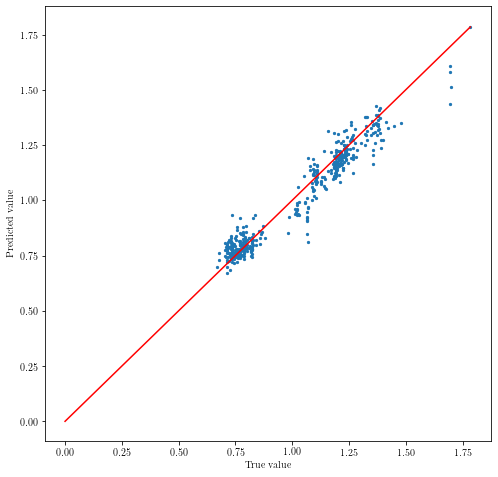

In [17]:
gudhi_distance(example_orbit_, example_orbit_, metric='bottleneck')

bottleneck_cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

bottleneck_cnn.predict(test_tiling.convert(to='field').state.reshape(1, 32, 32, 1))

y_predict = bottleneck_cnn.predict(X_test)

fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([0,y_test.max()],[0,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()